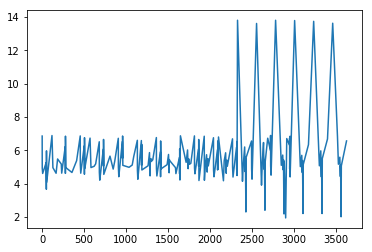

0.07131057268722467


,TIME,Value
count,259.000000,259.000000
mean,2007.266409,21543.854672
std,4.296482,138768.701894
min,2000.000000,7.000000
25%,2004.000000,131.500000
50%,2007.000000,174.300000
75%,2011.000000,375.500000
max,2015.000000,987406.000000


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('./eurostat/Freshwater_Resources_Data.csv',encoding='latin-1')
data.Value = data.Value.apply(lambda x: 'NaN' if x==':' else x)
data.Value = data.Value.apply(pd.to_numeric,errors='coerce')
data_clean =data.query('Value>0')
plt.plot(np.log(data_clean.Value))
plt.show()
print(len(data_clean)/len(data))
data_max = data_clean.query('Value>10000')
data_max
#What is wrong with these outliers??? -> All from the Sambre region...

0.05037313432835821


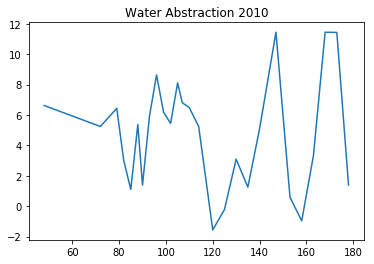

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('./WISE3/WaterAbstraction_danube.csv')
data.phenomenonTimePeriod = data.phenomenonTimePeriod.apply(pd.to_numeric,errors='coerce')
data_clean =data.query('resultObservedVolume>0&phenomenonTimePeriod==2010')
print(len(data_clean)/len(data))
plt.plot(np.log(data_clean.resultObservedVolume))
plt.title('Water Abstraction 2010')
plt.show()


16


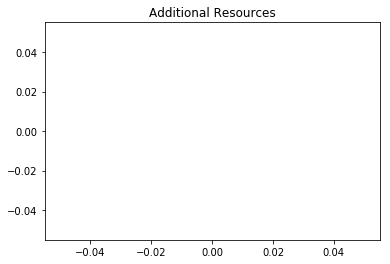

,Unnamed: 0,UID,versionId,beginLifeSpanVersion,spatialUnitIdentifier,spatialUnitIdentifierScheme,observedProperty,phenomenonTimePeriod,resultObservedVolume,resultObservationStatus,remarks,waterbaseObservationStatus,waterbaseRemarks
0,520,521,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30,CH,countryCode,DSW_TOTAL,2009,0.0,NaN,NaN,A,NaN
1,521,522,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30,CH,countryCode,DSW_TOTAL,2010,0.0,NaN,NaN,A,NaN
2,522,523,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30,CH,countryCode,DSW_TOTAL,2011,0.0,NaN,NaN,A,NaN
3,523,524,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30,CH,countryCode,DSW_TOTAL,2012,0.0,NaN,NaN,A,NaN
4,524,525,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30,CH,countryCode,EXP,2010,0.0,NaN,NaN,A,NaN
5,525,526,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30,CH,countryCode,EXP,2011,0.0,NaN,NaN,A,NaN
6,526,527,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30,CH,countryCode,EXP,2012,0.0,NaN,NaN,A,NaN
7,527,528,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30,CH,countryCode,IMP,2010,0.0,NaN,NaN,A,NaN
8,528,529,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30,CH,countryCode,IMP,2011,0.0,NaN,NaN,A,NaN
9,529,530,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30,CH,countryCode,IMP,2012,0.0,NaN,NaN,A,NaN


In [67]:
dataAddRes = pd.read_csv('./WISE3/AddResources_danube.csv')
dataAddRes.phenomenonTimePeriod = dataAddRes.phenomenonTimePeriod.apply(pd.to_numeric,errors='coerce')
dataAddRes_clean =dataAddRes.query('resultObservedVolume>0&phenomenonTimePeriod==2010')
print(len(dataAddRes))
plt.plot(np.log(dataAddRes_clean.resultObservedVolume))
plt.title('Additional Resources')
plt.show()
dataAddRes

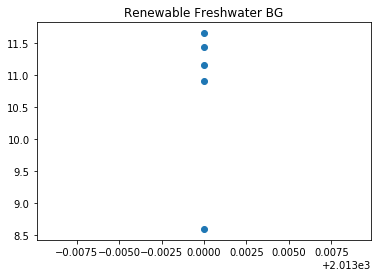

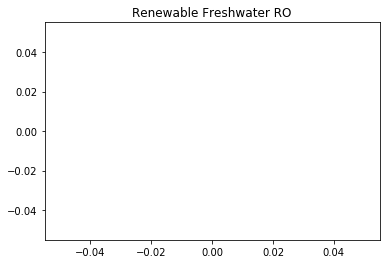

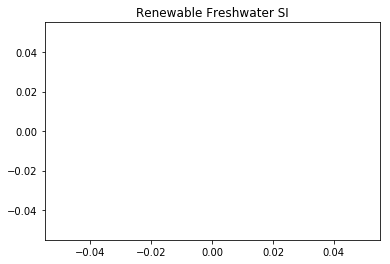

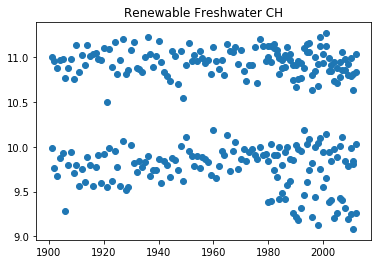

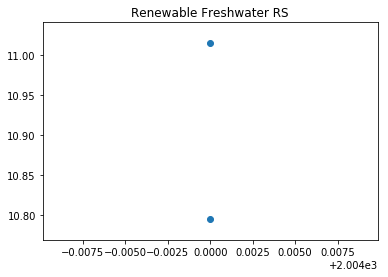

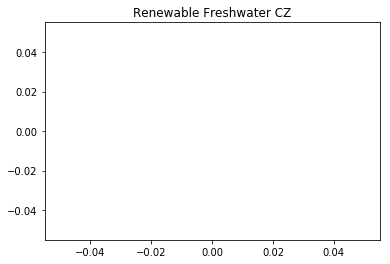

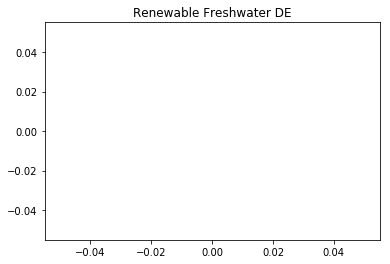

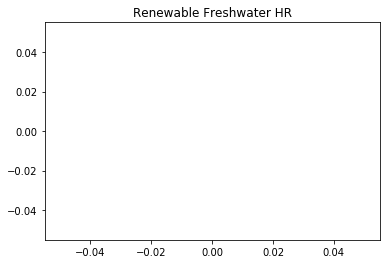

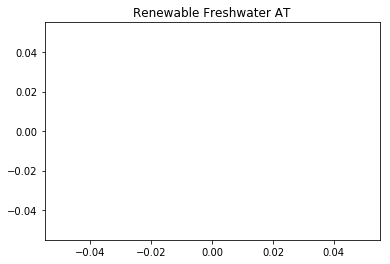

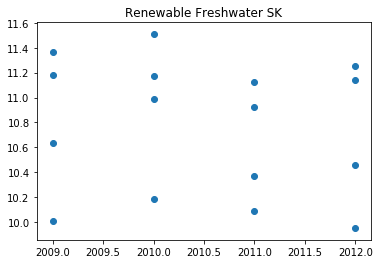

In [63]:
dataRenewable = pd.read_csv('./WISE3/RenewableFreshwater_danube.csv')
dataRenewable.phenomenonTimePeriod = dataRenewable.phenomenonTimePeriod.apply(pd.to_numeric,errors='coerce')
dataRenewable_clean =dataRenewable.query('resultObservedVolume>0')#&phenomenonTimePeriod==2010')
for country in ['BG', 'RO', 'SI', 'CH', 'RS', 'CZ', 'DE', 'HR', 'AT', 'SK']:
    dataRenewable_country = dataRenewable_clean[dataRenewable_clean['spatialUnitIdentifier']==country]
    plt.scatter(dataRenewable_country.phenomenonTimePeriod,np.log(dataRenewable_country.resultObservedVolume))
    plt.title('Renewable Freshwater '+country)
    plt.show()

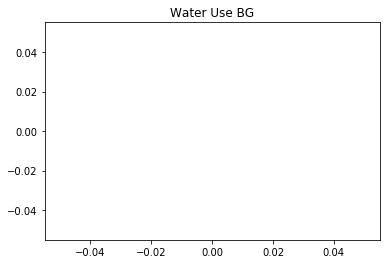

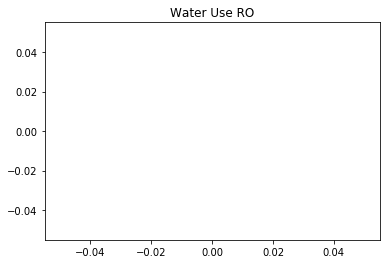

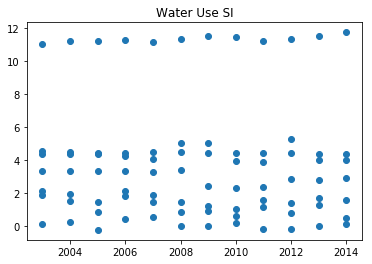

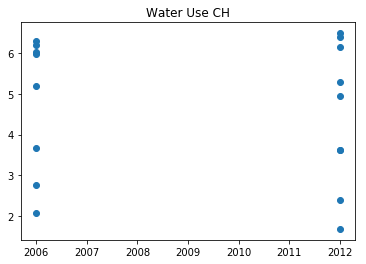

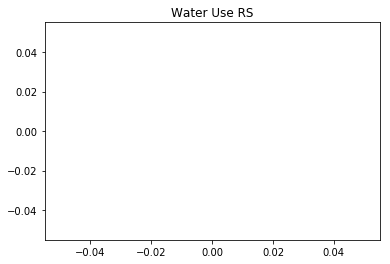

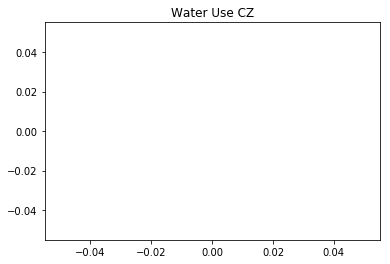

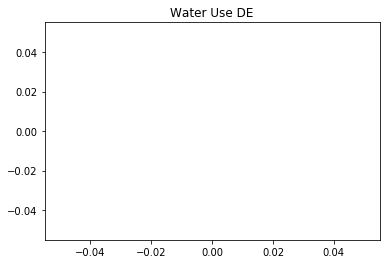

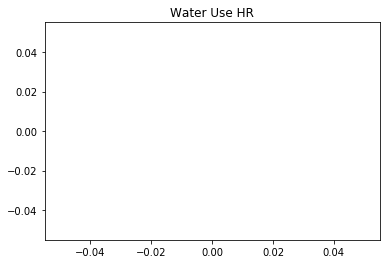

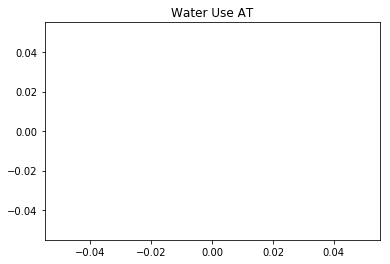

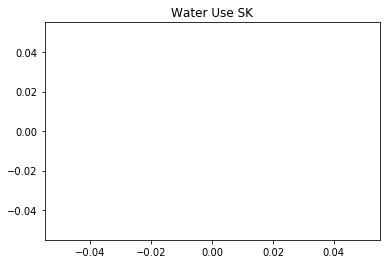

In [62]:
dataUse = pd.read_csv('./WISE3/WaterUse_danube.csv')
dataUse.phenomenonTimePeriod = dataUse.phenomenonTimePeriod.apply(pd.to_numeric,errors='coerce')
dataUse_clean =dataUse.query('resultObservedVolume>0')#&phenomenonTimePeriod==2010')
for country in ['BG', 'RO', 'SI', 'CH', 'RS', 'CZ', 'DE', 'HR', 'AT', 'SK']:
    dataUse_country = dataUse_clean[dataUse_clean['spatialUnitIdentifier']==country]
    plt.scatter(dataUse_country.phenomenonTimePeriod,np.log(dataUse_country.resultObservedVolume))
    plt.title('Water Use '+country)
    plt.show()

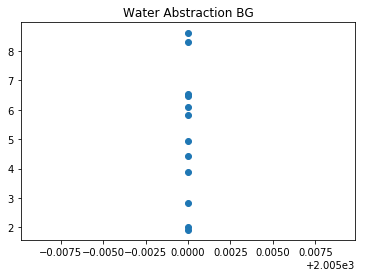

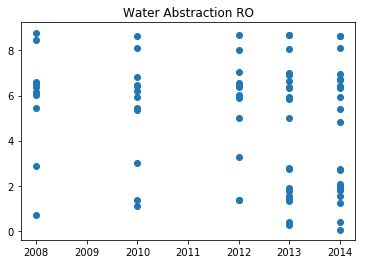

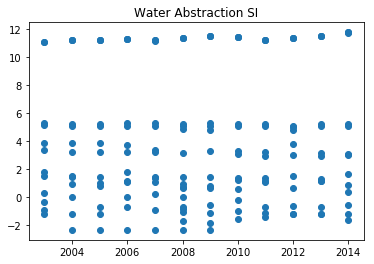

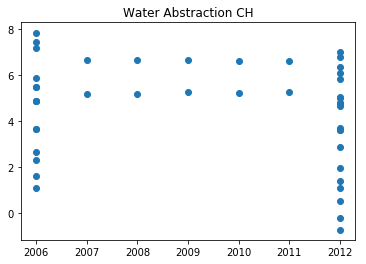

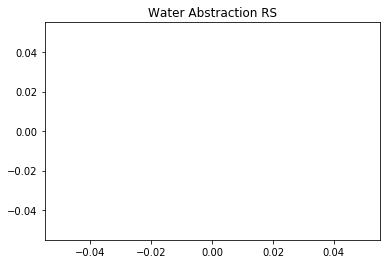

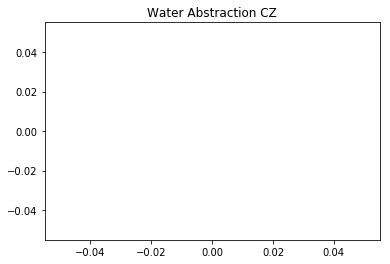

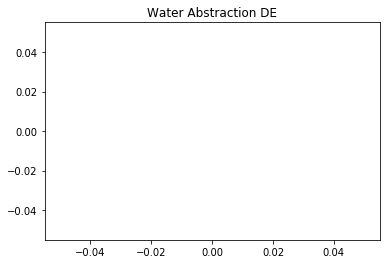

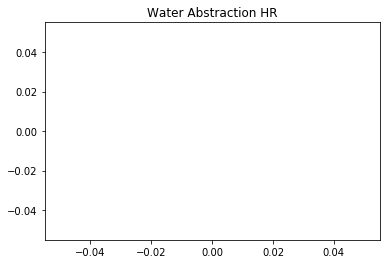

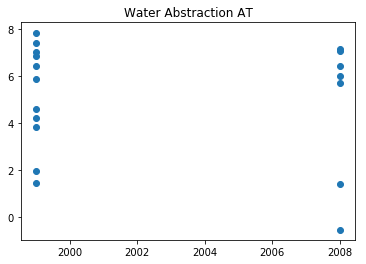

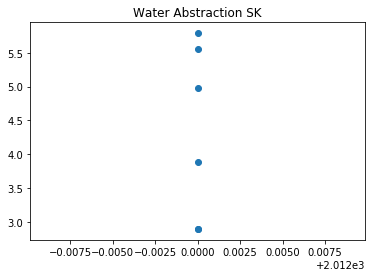

In [61]:
dataAbstraction = pd.read_csv('./WISE3/WaterAbstraction_danube.csv')
dataAbstraction.phenomenonTimePeriod = dataAbstraction.phenomenonTimePeriod.apply(pd.to_numeric,errors='coerce')
dataAbstraction_clean =dataAbstraction.query('resultObservedVolume>0')#&phenomenonTimePeriod==2010')
for country in ['BG', 'RO', 'SI', 'CH', 'RS', 'CZ', 'DE', 'HR', 'AT', 'SK']:
    dataAbstraction_country = dataAbstraction_clean[dataAbstraction_clean['spatialUnitIdentifier']==country]
    plt.scatter(dataAbstraction_country.phenomenonTimePeriod,np.log(dataAbstraction_country.resultObservedVolume))
    plt.title('Water Abstraction '+country)
    plt.show()

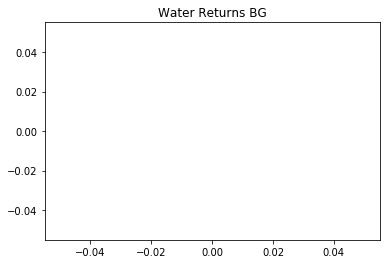

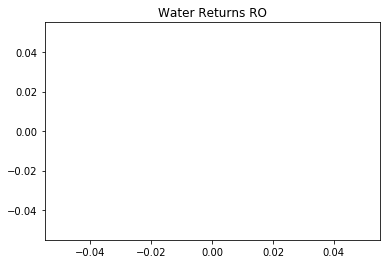

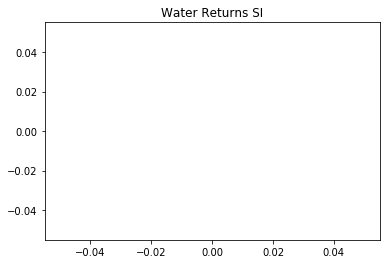

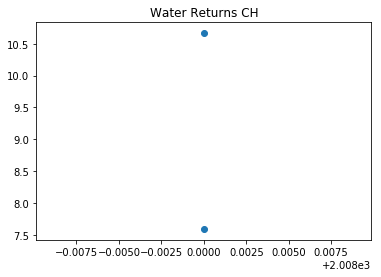

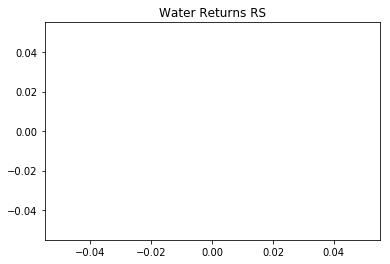

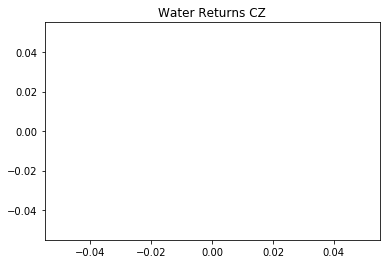

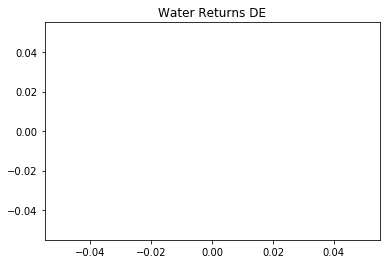

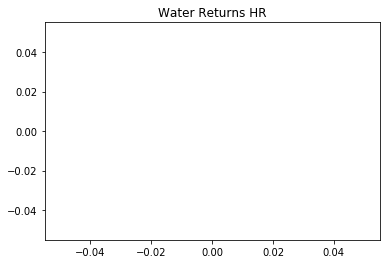

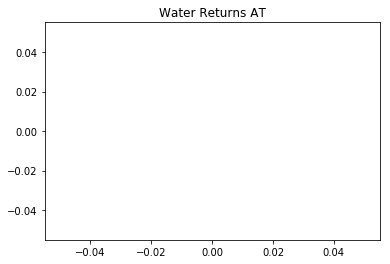

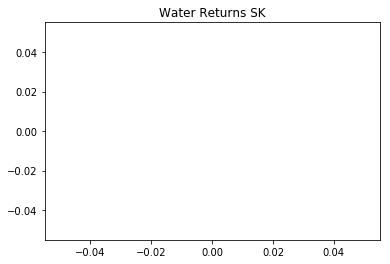

In [64]:
dataReturns = pd.read_csv('./WISE3/WaterReturns_danube.csv')
dataReturns.phenomenonTimePeriod = dataReturns.phenomenonTimePeriod.apply(pd.to_numeric,errors='coerce')
dataReturns_clean =dataReturns.query('resultObservedVolume>0')#&phenomenonTimePeriod==2010')
for country in ['BG', 'RO', 'SI', 'CH', 'RS', 'CZ', 'DE', 'HR', 'AT', 'SK']:
    dataReturns_country = dataReturns_clean[dataReturns_clean['spatialUnitIdentifier']==country]
    plt.scatter(dataReturns_country.phenomenonTimePeriod,np.log(dataReturns_country.resultObservedVolume))
    plt.title('Water Returns '+country)
    plt.show()